In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv('new_data.csv')
df

,Gender,Age,MeterBefore,KgBefore,MinBefore,Medicine1,Medicine2,Medicine3,MeterAfter,KgAfter,MinAfter,SideEffects,DistanceDiff,WeightDiff,SpeedBefore,SpeedAfter,WeightLoss,ImprovedSpeed,WeightGain
0,F,32,4060.0,74.7,41.2,No,No,No,4370.0,91.8,61.1,N,310.0,17.1,98.54,71.52,0,0,1
1,F,26,5170.0,75.4,59.6,No,No,No,5810.0,89.1,60.9,N,640.0,13.7,86.74,95.40,0,1,1
2,M,37,5310.0,93.9,50.6,No,Yes,Yes,5670.0,87.8,67.9,N,360.0,-6.1,104.94,83.51,1,0,0
3,F,44,3930.0,87.6,36.8,No,Yes,No,4300.0,92.4,59.2,N,370.0,4.8,106.79,72.64,0,0,1
4,F,31,3730.0,71.8,61.2,No,Yes,No,3790.0,94.8,60.5,N,60.0,23.0,60.95,62.64,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,M,27,4850.0,87.1,45.0,Yes,Yes,No,4390.0,88.7,64.4,N,-460.0,1.6,107.78,68.17,0,0,1
344,M,40,3750.0,80.2,47.7,No,Yes,No,4110.0,94.0,55.1,N,360.0,13.8,78.62,74.59,0,0,1
345,M,28,5020.0,97.1,48.5,No,Yes,No,4210.0,86.5,60.2,N,-810.0,-10.6,103.51,69.93,1,0,0
346,M,39,5690.0,77.5,39.3,No,No,Yes,5410.0,85.8,61.0,Y,-280.0,8.3,144.78,88.69,0,0,1


## Normalization Verification

In [8]:
# To perform paired t-test, I must first verify the speed difference before and after treatment
# is normally distributed
# The treatment combinations as in [Medicine1, Medicine2, Medicine3] are:
# [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]
def treatment_check(con1, con2, con3):
    res = df[(df['Medicine1'] == con1) & (df['Medicine2'] == con2) & (df['Medicine3'] == con3)]
    res = res[['Medicine1', 'Medicine2', 'Medicine3', 'SpeedBefore', 'SpeedAfter']]
    res['SpeedDiff'] = round(res['SpeedAfter'] - res['SpeedBefore'], 2)
    return res
no_med = treatment_check('No', 'No', 'No')
med1 = treatment_check('Yes', 'No', 'No')
med2 = treatment_check('No', 'Yes', 'No')
med3 = treatment_check('No', 'No', 'Yes')
med1_2 = treatment_check('Yes', 'Yes', 'No')
med1_3 = treatment_check('Yes', 'No', 'Yes')
med2_3 = treatment_check('No', 'Yes', 'Yes')
all_med = treatment_check('Yes', 'Yes', 'Yes')

### Checking the before & after speed means

In [6]:
no_med['SpeedBefore'].mean(), no_med['SpeedAfter'].mean()

(108.82557692307691, 80.3771153846154)

In [7]:
med1['SpeedBefore'].mean(), med1['SpeedAfter'].mean()

(106.50571428571429, 71.2457142857143)

In [8]:
med2['SpeedBefore'].mean(), med2['SpeedAfter'].mean()

(105.49090909090911, 73.08373737373739)

In [9]:
med3['SpeedBefore'].mean(), med3['SpeedAfter'].mean()

(100.02804878048784, 71.74682926829269)

In [10]:
med1_2['SpeedBefore'].mean(), med1_2['SpeedAfter'].mean()

(99.13264705882354, 72.73323529411765)

In [11]:
med1_3['SpeedBefore'].mean(), med1_3['SpeedAfter'].mean()

(90.91785714285716, 67.81785714285714)

In [12]:
med2_3['SpeedBefore'].mean(), med2_3['SpeedAfter'].mean()

(98.79616666666666, 75.00599999999999)

In [13]:
all_med['SpeedBefore'].mean(), all_med['SpeedAfter'].mean()

(114.9485294117647, 71.36323529411766)

## Shapiro-Wilk and QQ Plots tests

In [14]:
from scipy.stats import shapiro
# Shapiro-Wilk test function
def shapiro_test(df, column):
    stat, p = shapiro(df[column])
    alpha = 0.05
    print(f"Shapiro-Wilk test: statistic={stat:.3f}, p-value={p:.3f}")
    if p > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")


In [15]:
import statsmodels.api as sm

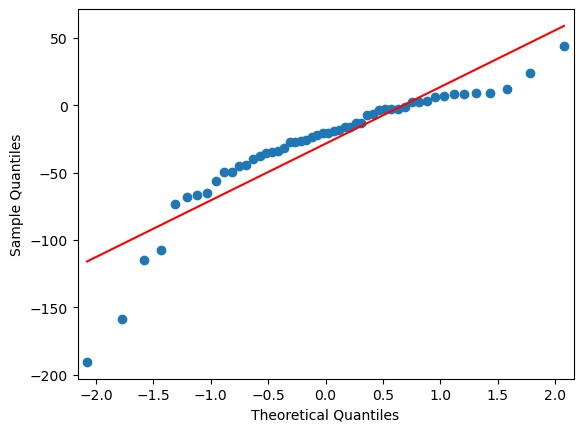

In [16]:
# Verifying normal distribution using QQ plots and Shapiro-Wilk test
# create a QQ-plot
sm.qqplot(no_med['SpeedDiff'], line='s')
# show the plot
plt.show()

In [17]:
shapiro_test(no_med, 'SpeedDiff')

Shapiro-Wilk test: statistic=0.849, p-value=0.000
Sample does not look Gaussian (reject H0)


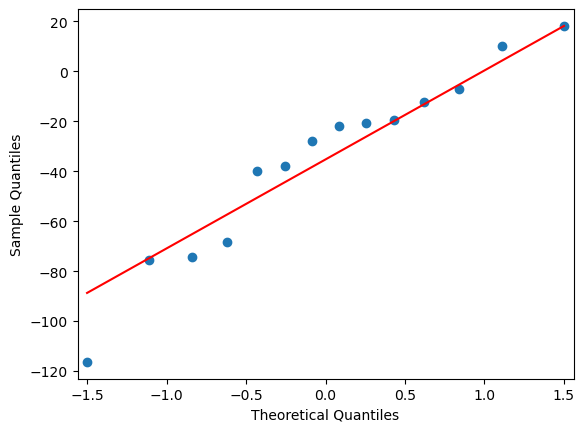

In [18]:
# create a QQ-plot
sm.qqplot(med1['SpeedDiff'], line='s')
# show the plot
plt.show()

In [19]:
shapiro_test(med1, 'SpeedDiff')

Shapiro-Wilk test: statistic=0.945, p-value=0.480
Sample looks Gaussian (fail to reject H0)


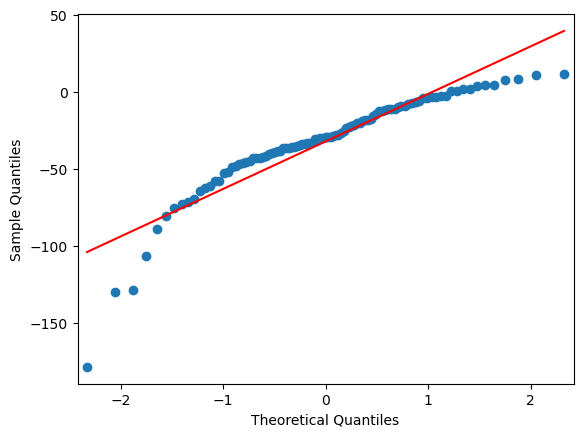

In [20]:
# create a QQ-plot
sm.qqplot(med2['SpeedDiff'], line='s')
# show the plot
plt.show()

In [21]:
shapiro_test(med2, 'SpeedDiff')

Shapiro-Wilk test: statistic=0.867, p-value=0.000
Sample does not look Gaussian (reject H0)


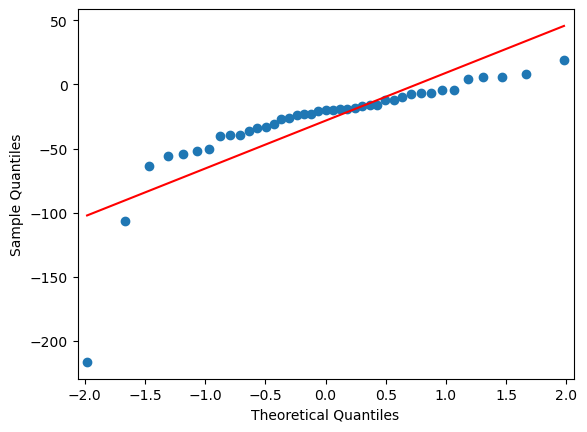

In [22]:
# create a QQ-plot
sm.qqplot(med3['SpeedDiff'], line='s')
# show the plot
plt.show()

In [23]:
shapiro_test(med3, 'SpeedDiff')

Shapiro-Wilk test: statistic=0.689, p-value=0.000
Sample does not look Gaussian (reject H0)


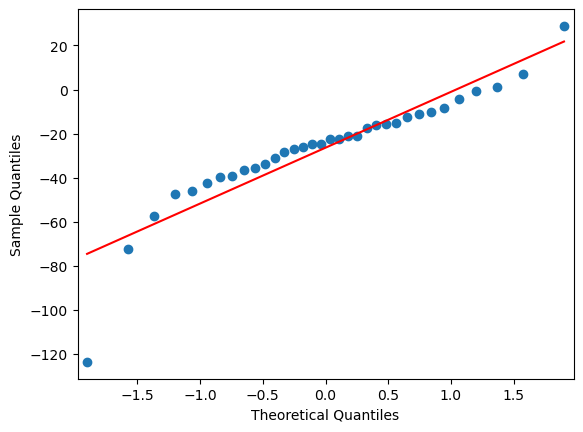

In [24]:
# create a QQ-plot
sm.qqplot(med1_2['SpeedDiff'], line='s')
# show the plot
plt.show()

In [25]:
shapiro_test(med1_2, 'SpeedDiff')

Shapiro-Wilk test: statistic=0.886, p-value=0.002
Sample does not look Gaussian (reject H0)


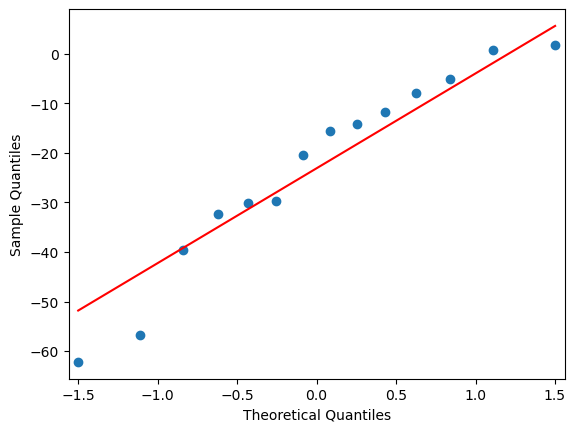

In [26]:
# create a QQ-plot
sm.qqplot(med1_3['SpeedDiff'], line='s')
# show the plot
plt.show()

In [27]:
shapiro_test(med1_3, 'SpeedDiff')

Shapiro-Wilk test: statistic=0.931, p-value=0.318
Sample looks Gaussian (fail to reject H0)


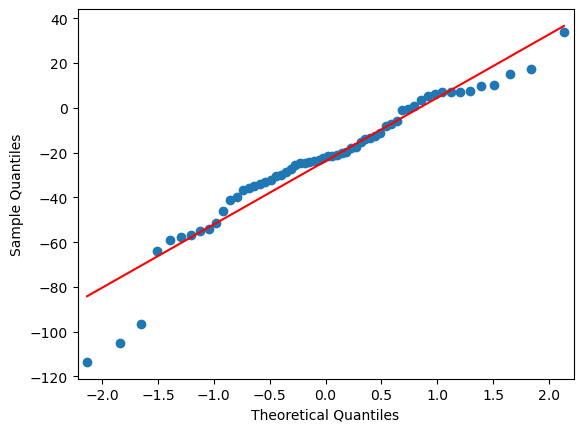

In [28]:
# create a QQ-plot
sm.qqplot(med2_3['SpeedDiff'], line='s')
# show the plot
plt.show()

In [29]:
shapiro_test(med2_3, 'SpeedDiff')

Shapiro-Wilk test: statistic=0.938, p-value=0.004
Sample does not look Gaussian (reject H0)


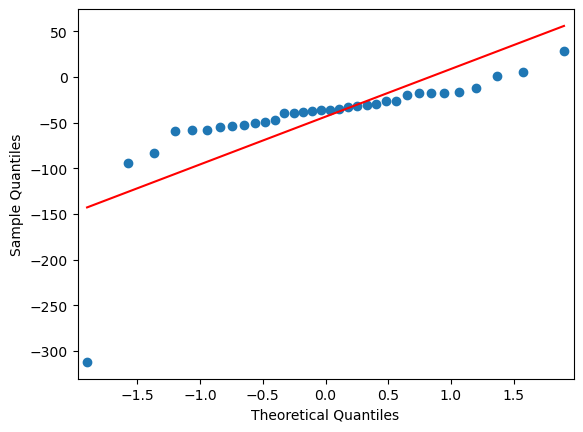

In [30]:
# create a QQ-plot
sm.qqplot(all_med['SpeedDiff'], line='s')
# show the plot
plt.show()

In [31]:
shapiro_test(all_med, 'SpeedDiff')

Shapiro-Wilk test: statistic=0.581, p-value=0.000
Sample does not look Gaussian (reject H0)


## Paired T-Test on normally distributed data

In [1]:
# Only medicine 1, medicine 1&3 combinations are normally distributed. 
# So paired t-test can only be done on them
# Perform paired t-test
import scipy.stats as stats

In [4]:
# Paired T-test
def ttest(t_statistic, p_value):
    if p_value/2 < 0.05 and t_statistic < 0:
        print("The mean of Speed After is significantly less than the mean of Speed Before.")
    elif p_value/2 < 0.05 and t_statistic > 0:
        print("The mean of Speed After is significantly more than the mean of Speed Before.")
    elif p_value >= 0.05:
        print("The mean of Speed After is not significantly different than the mean of Speed Before.")
    print(t_statistic, p_value)

In [13]:
t_statistic1, p_value1 = stats.ttest_rel(med1['SpeedAfter'], med1['SpeedBefore'])
ttest(t_statistic1, p_value1)

The mean of Speed After is significantly less than the mean of Speed Before.
-3.5699527069468475 0.0034231090568051545


In [14]:
t_statistic13, p_value13 = stats.ttest_rel(med1_3['SpeedAfter'], med1_3['SpeedBefore'])
ttest(t_statistic13, p_value13)

The mean of Speed After is significantly less than the mean of Speed Before.
-4.354118610814432 0.0007810322953863914
